# Sky Huang

## Research question/interests

**I want to look at the effects of large bodies of water on the air quality, by looking at the level of CO, CO2, NO2, and other chemicals such as benzene** at both coastal and landlocked metro areas and comparing them. Furthermore, I will check if asthma levels are significantly different across these two categories. Additionally, I will try to control other variables by only comparing metro areas of similar size.I plan to filter the data to isolate coastal and landlocked metro areas, and then compare the air quality levels of these two groups.

## Plan 
1. Filter the data to isolate coastal and landlocked metro areas
2. look for collation between air quality and asthma levels in each group individually
3. check for collation between air quality and asthma levels in both groups combined
4. Analyze the data to see if there is a significant difference in air quality between the two groups

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot as gplt

aqi = pd.concat(pd.read_csv(f"../data/raw/annual_aqi_by_cbsa_{year}.csv") for year in range(2011, 2023))

# aqi2011 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2011.csv")
# aqi2012 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2012.csv")
# aqi2013 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2013.csv")
# aqi2014 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2014.csv")
# aqi2015 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2015.csv")
# aqi2016 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2016.csv")
# aqi2017 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2017.csv")
# aqi2018 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2018.csv")
# aqi2019 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2019.csv")
# aqi2020 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2020.csv")
# aqi2021 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2021.csv")
# aqi2022 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2022.csv")

concentration = pd.concat(pd.read_csv(f"../data/raw/annual_conc_by_monitor_{year}.csv") for year in range(2011, 2023))
# concentration2011= pd.read_csv("../data/raw/annual_conc_by_monitor_2011.csv")
# concentration2012= pd.read_csv("../data/raw/annual_conc_by_monitor_2012.csv")
# concentration2013= pd.read_csv("../data/raw/annual_conc_by_monitor_2013.csv")
# concentration2014= pd.read_csv("../data/raw/annual_conc_by_monitor_2014.csv")
# concentration2015= pd.read_csv("../data/raw/annual_conc_by_monitor_2015.csv")
# concentration2016= pd.read_csv("../data/raw/annual_conc_by_monitor_2016.csv")
# concentration2017= pd.read_csv("../data/raw/annual_conc_by_monitor_2017.csv")
# concentration2018= pd.read_csv("../data/raw/annual_conc_by_monitor_2018.csv")
# concentration2019= pd.read_csv("../data/raw/annual_conc_by_monitor_2019.csv")
# concentration2020= pd.read_csv("../data/raw/annual_conc_by_monitor_2020.csv")
# concentration2021= pd.read_csv("../data/raw/annual_conc_by_monitor_2021.csv")
# concentration2022= pd.read_csv("../data/raw/annual_conc_by_monitor_2022.csv")
combined = concentration.merge(
    aqi, how="inner", left_on=["Year", "CBSA Name"], right_on=["Year", "CBSA"]
).drop(columns=["CBSA"])


<AxesSubplot: xlabel='Median AQI', ylabel='State Name'>

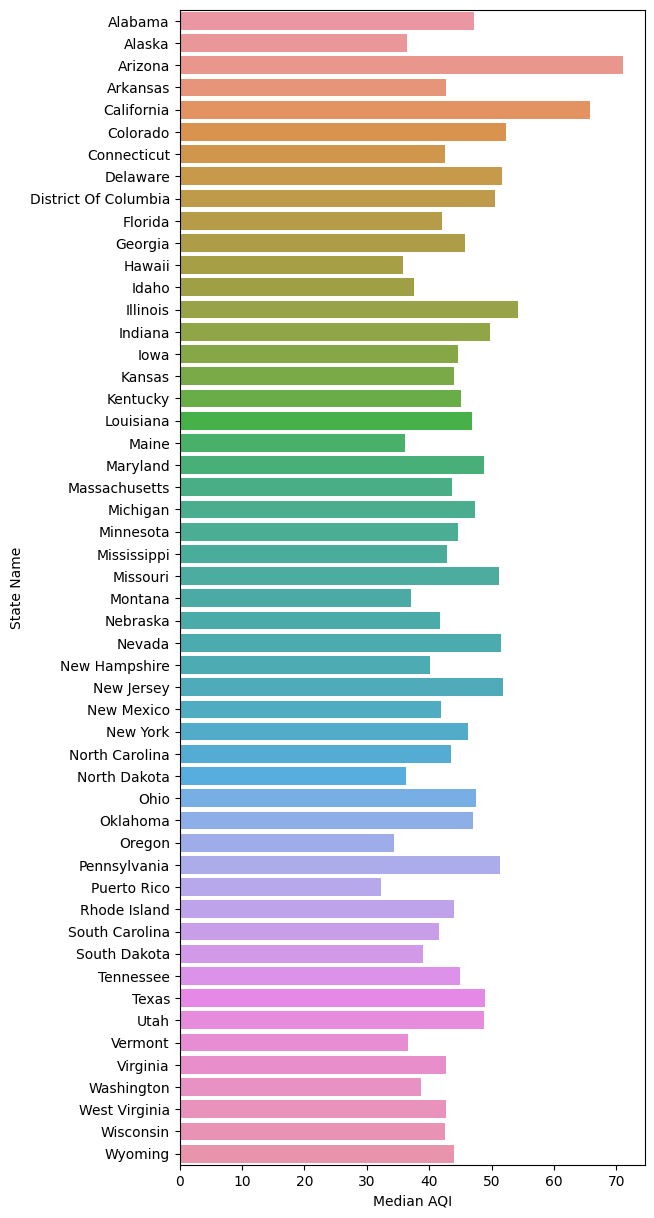

In [8]:
eda = combined.groupby(["State Name"])[["Max AQI","90th Percentile AQI","Median AQI"]].mean()
fig, ax = plt.subplots(figsize=(6, 15))
sns.barplot(data=eda, x="Median AQI", y=eda.index, ax=ax)

<AxesSubplot: xlabel='Median AQI', ylabel='State Name'>

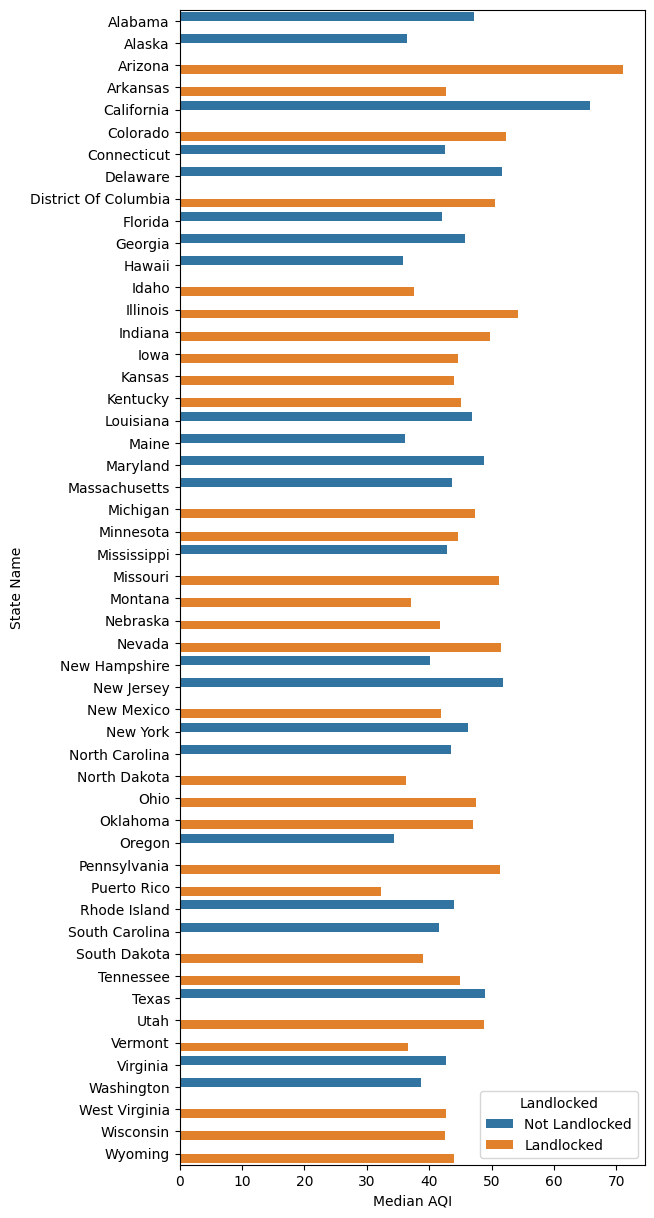

In [11]:
notlandlocked = ['Alaska', 'Hawaii', 'Washington', 'Oregon', 'California', 'Texas', 'Louisiana', 'Alabama', 'Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Virginia', 'Maryland', 'Delaware', 'New Jersey', 'Mississippi', 'New York', 'Connecticut', 'Rhode Island', 'Massachusetts', 'New Hampshire', 'Maine']
li = []
for i in eda.index:
    landlocked = True
    if i in notlandlocked:
        landlocked = False
    if landlocked:
        li.append("Landlocked")
    else:
        li.append("Not Landlocked")
eda["Landlocked"] = li
fig, ax = plt.subplots(figsize=(6, 15))
sns.barplot(data=eda, x="Median AQI", y=eda.index, hue="Landlocked")

<AxesSubplot: xlabel='Median AQI', ylabel='State Name'>

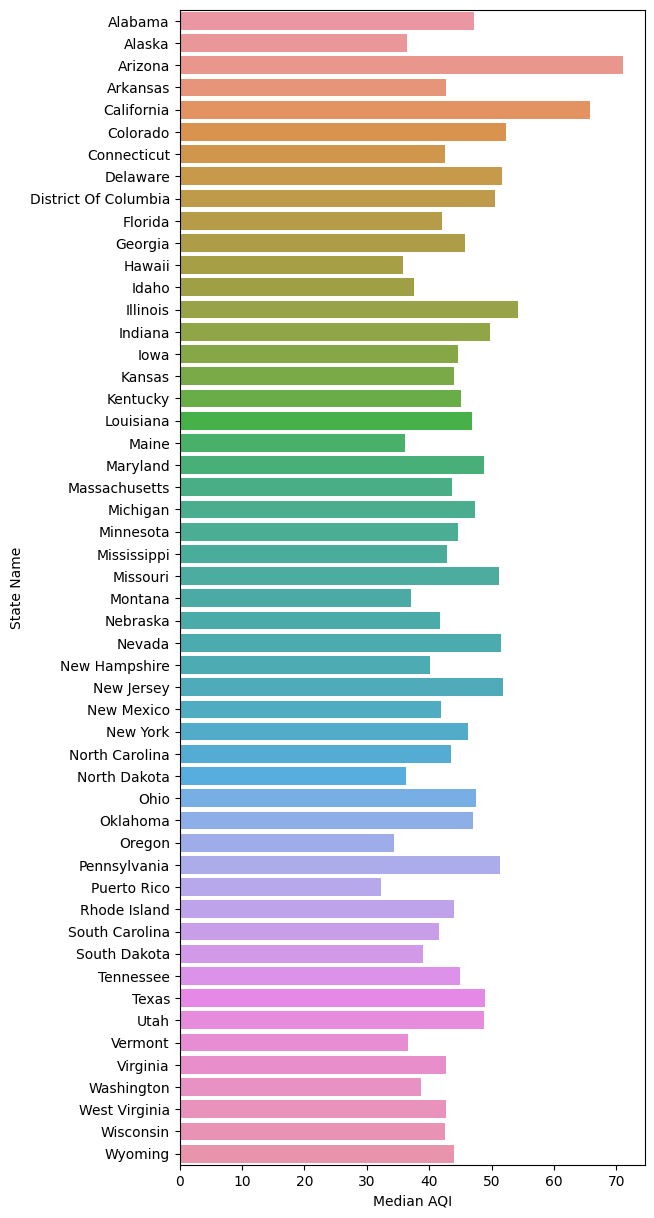

In [3]:
geo = gpd.GeoDataFrame(combined)
